In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# generating data for the discussed example
#predicted results
tp = [1]*700 # model gave 1s
fn = [0]*120 # model gave 0s
tp_fn = tp+fn

tn =[0]*100 # model gave 0s
fp = [1]*80 # model gave 1s
tn_fp=tn+fp

res_pred = tp_fn+tn_fp

# true results
act_pos = [1]*820
act_neg = [0]*180

res_true = act_pos + act_neg

1000

In [115]:
data = {'pred':res_pred, 
        'true':res_true}
df = pd.DataFrame(data)

In [118]:
conf_mat = confusion_matrix(np.abs(df['pred']-1), np.abs(df['true']-1))
conf_mat

array([[700,  80],
       [120, 100]])

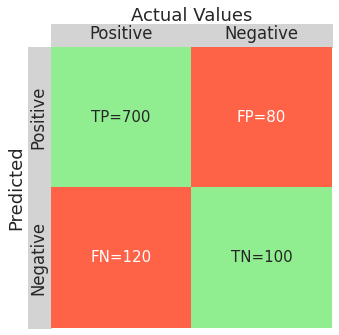

In [119]:
cm = [[conf_mat[0][0], conf_mat[0][1]], [conf_mat[1][0], conf_mat[1][1]]]
sns.set(font_scale=1.5)
plt.figure(figsize=(5 ,5))
ax = sns.heatmap(data=[[1,0],
                       [0,1]],
                cmap=sns.color_palette(['tomato', 'lightgreen'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.08, color='lightgrey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.08, 1, color='lightgrey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()